## Генераторы случайных чисел

![img](https://cdn.ablebits.com/_img-blog/random-generator/random-generator.png)

Желаемые свойства ГСЧ:
* моделирует равномерное распределение на [0, 1]
* проходит статистические тесты (какие?)
* высокая скорость работы
* большой период
* может работать на любом вычислительном устройстве
* воспроизводимость (а как же случайность?)
* криптографическая устойчивость (это не противоречит предыдущим требованиям?)

Генератор псевдослучайных чисел - это __алгоритм__ (!!!), который проходит статистические тесты.

### Middle-square algorithm
John von Neumann, 1949

Идея:
1. задаем четырехзначный seed - первое число случайной последовательности
2. возводим в квадрат, получаем 8-ми значное число (при необходимости, дополняем нулями)
3. берем четырехзначное число из середины - это следующий элемент случайной последовательности
4. повторяем 2-3

In [ ]:
import numpy as np

def midsquare(val, n=4):
    return int(str(val**2).zfill(2*n)[n//2:-n//2])

seed = 5497
seq = [seed]
for _ in range(100):
    seq.append(midsquare(seq[-1]))
np.array(seq)

array([5497, 2170, 7089, 2539, 4465, 9362, 6470, 8609, 1148, 3179, 1060,
       1236, 5276, 8361, 9063, 1379, 9016, 2882, 3059, 3574, 7734, 8147,
       3736, 9576, 6997, 9580, 7764, 2796, 8176, 8469, 7239, 4031, 2489,
       1951, 8064,  280,  784, 6146, 7733, 7992, 8720,  384, 1474, 1726,
       9790, 8441, 2504, 2700, 2900, 4100, 8100, 6100, 2100, 4100, 8100,
       6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100,
       8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100,
       4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100,
       2100, 4100, 8100, 6100, 2100, 4100, 8100, 6100, 2100, 4100, 8100,
       6100, 2100])

Может быть усложним алгоритм, добавив еще несколько операций?

```
… random numbers should not be
generated with a method chosen at
random. Some theory should be
used.
```
D. Knuth

### Linear congruential generator (LCG)

Linear congruential generator производит последовательность:
$$ z_{i+1} = (az_i + c) \mod m $$

Число $z_0$ называется *seed* и обеспечивает воспроизводимость последовательности “случайных” чисел.

Напишем функцию, которая реализует LCG (на практике чуть сложнее):

In [4]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

# setting the seed
rng.current = 1

Выведем несколько первых элементов последовательности:

In [5]:
[rng() for _ in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

Как проверить, что последовательность действительно похожа на выборку из равномерного распределения?

Сделаем выборку побольше

In [6]:
samples = [rng() for _ in range(1000)]

В качестве первого шага построим гистограмму

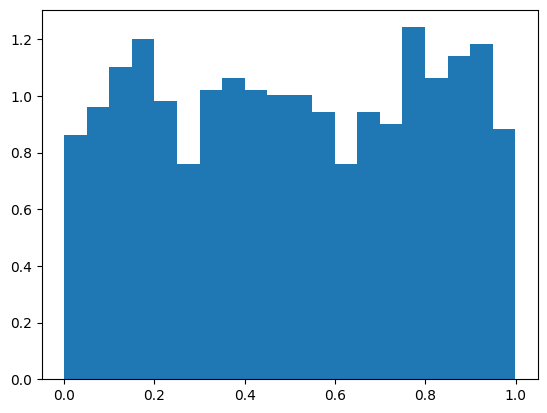

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(samples, bins=20, density=True)
plt.show()

На вид гистограммма не противоречит гипотезе о равномерности распределения, но нужны более точные количественные оценки. Их получают с помощью статистических тестов.

###Статистические тесты

Общая идея статистических тестов. Пусть мы хотим проверить гипотезу о том, что выборка Х принадлежит некоторому конкретному (совершенно конкретному) распределению F. Задача состоит в том, чтобы придумать такую статистику (функцию от выборки) T(X), которая в случае истинности нашей гипотезы будет иметь (при $n\to\infty$) наперед известное распределение, например N(0, 1). Посчитаем значение статистики Т=Т(Х) на нашей выборке. Если полученное число Т окажется крайне нетипичным для нормального N(0, 1) распределения, отвергнем гипотезу. Более точно, вычислим $p=P(|\xi|\ge|T|)$ для $\xi\sim N(0,1)$. Это число $p$ имеет специальное название: $p$-value. Если оно маленькое, например, меньше 0.05, то это повод отвергнуть гипотезу.

Далее обсудим конкретные тесты.


### Kolmogorov-Smirnov test

Проверяем гипотезу, что выборка получена из распределения F.
Вычисляем статистику
$$T(X) = \sup_x| F(x) - F_n(x)|,$$
где $F_n(x)$ - эмпирическая функция распределения, построенная по выборке Х объема n.
По сути, Т - это наибольшее расстояние между двумя графиками (см. картинку ниже).

Оказывается, что в случае истинности гипотезы, величина $ \sqrt{n}T$ имеет (в пределе больших n) особое распределение, которое называется [распределением Колмогорова](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9A%D0%BE%D0%BB%D0%BC%D0%BE%D0%B3%D0%BE%D1%80%D0%BE%D0%B2%D0%B0).

Распределение Колмогорова является табличным, поэтому для любого значения статистики Т мы можем найти $p$-value и увидеть, будет оно маленьким или нет.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/KS_Example.png/450px-KS_Example.png)

На практике все делается одной строкой (проверяет гипотезу о принадлежности выбоки равномерному распределению ```stats.uniform.cdf```):

In [ ]:
from scipy import stats

stats.kstest(samples, stats.uniform.cdf)

KstestResult(statistic=0.026368738710880302, pvalue=0.4892115759774217)

Как интерпретировать результаты?

statistic=0.02636 - значение статистики (максимальное расстояние между графиками)

pvalue=0.48921 - pvalue для этого значения статистики. Видим, что pvalue > 0.05, так что мы решаем НЕ отвергать гипотезу о равномерном распределении.

Для сравнения, проверим гипотезу, что выборка порождена нормальным законом:

In [ ]:
stats.kstest(samples, stats.norm.cdf)

KstestResult(statistic=0.500866322716208, pvalue=1.4724733582412854e-232)

Здесь pvalue крайне маленькое, и мы смело отвергаем гипотезу.

### Chi-squared test (Pearson's chi-squared test)

Один из самых популярных тестов. Снова проверяем гипотезу, что выборка (объема n) пришла из распределения F. Идея в том, чтобы разбить всю область определения случайной величины на К интервалов и в каждом интервале посчитать, сколько элементов выборки попало в данный интервал и сколько мы бы ожидали там увидеть, если бы выборка имела размер n и порождалась распределением F. Составляем статистику
$$\chi^2_{K-1}=\sum\limits_{i=1}^{K}\frac{(E_i-O_i)^2}{E_i}$$

$E_i, O_i$ - ожидаемые (expected) и наблюдаемые (observed) количества элементов выборки в i-ом интервале значений.

Рекомендуется выбирать K таким, чтобы $O_i, E_i \ge 5$.

Если гипотеза верна, то статистика критерия имеет (в пределе больших n) распределение хи-квадрат с К-1 степенью свободы.

Пример применения теста хи-квадрат:

In [ ]:
k = 20
f_obs = np.histogram(samples, np.linspace(0, 1, k+1))[0]
f_exp = np.full(k, len(samples) // k)

f_obs, f_exp, stats.chisquare(f_obs, f_exp)

(array([42, 49, 55, 60, 49, 38, 51, 53, 51, 50, 50, 47, 38, 47, 45, 65, 50,
        60, 56, 44], dtype=int64),
 array([50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50,
        50, 50, 50]),
 Power_divergenceResult(statistic=18.599999999999998, pvalue=0.48275240319942647))

Вывод - наблюдаемое значение статистики не противоречит гипотезе о равномерном распределении.

Проблема: последовательности ```sorted(samples)``` и ```samples``` неразличимы для KS и Chi2 тестов. Нужны дополнительные тесты.


### Serial test

Идея: разбить последовательность $x_1, x_2, x_3, ..., x_{2n}$ на последовательные серии длины 2: $(x_1, x_2), (x_3, x_4), ..., (x_{2n-1}, x_{2n})$ и посмотреть на каждый элемент как на случайную и независимую точку в 2D пространстве. Далее применить хи-квадрат. Аналогично, можно строить серии длины 3, 4 и т.д.

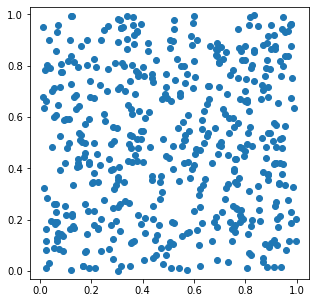

In [ ]:
fig = plt.figure(figsize=(5, 5))
fig.patch.set_facecolor('xkcd:white')

plt.scatter(samples[::2], samples[1::2])
plt.axis('equal')
plt.show()

### Задача 1*
Реализовать serial test и применить к выборке samples

In [ ]:
#code here

### Permutation test

Снова разобъем последовательность $x_1, x_2, x_3, ..., x_{dn}$ на последовательные серии длины d: $(x_1, ..., x_d), (x_{d+1}, x_{2d+d}), ..., (x_{nd-d}, x_{nd})$. Серия из d элементов может быть упорядочена d! способами и каждый способ упорядочивания равновероятен. Отсюда идея теста - посчитать, сколько раз каждый порядок встречается среди n серий и применить хи-квадрат тест.

### Задача 2*
Реализовать permutation test и применить к выборке samples

In [ ]:
#code here

Выбор параметров $m$, $a$ и $c$ существенно влияет на качество последовательности. Если параметры выбрать неудачно, это может привести к неожиданным последствиям:

In [ ]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
rng_bad.current = 1

random = [rng_bad() for _ in range(30000)]
print("This sequence looks as random:")
random[:10]

This sequence looks as random:


[3.051897510886192e-05,
 0.00018310965970158577,
 0.0008239871822297573,
 0.003295936156064272,
 0.012359732296317816,
 0.04449496837332845,
 0.15573221957311034,
 0.533938602078706,
 0.8020416363142431,
 0.006802399177104235]

Гистограмма распределения похожа на равномерное:

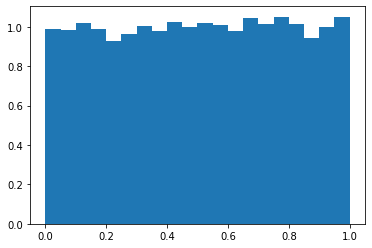

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

plt.hist(random, 20, density=True)
plt.show()

Однако, тест серий показывает, что точки располагаются на гиперплоскостях, что плохо согласуется с представлением о случайности:

<IPython.core.display.Javascript object>


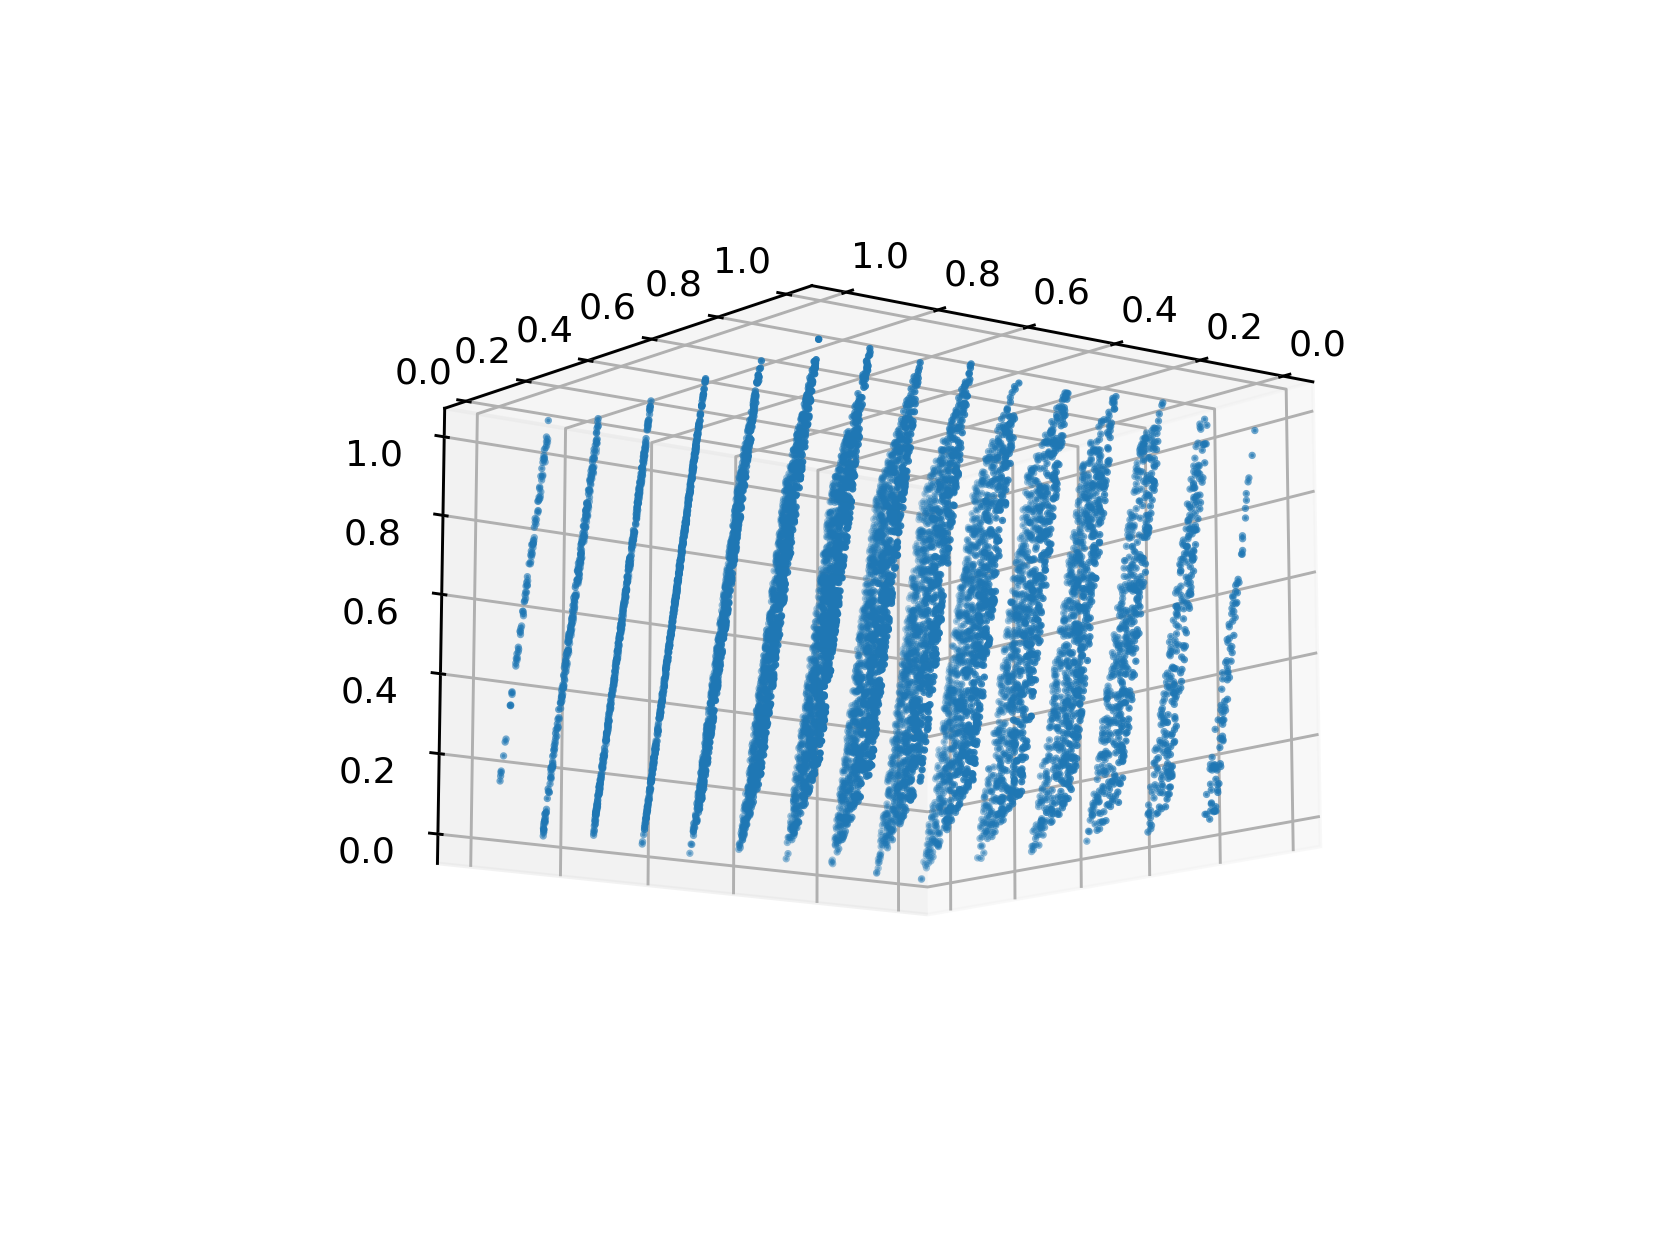

In [ ]:
import matplotlib
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(random[::3], random[1::3], random[2::3], s=1)
plt.show()

### Задача 3*

Привести статистический тест, который покажет, что с rng_bad есть проблемы, а с rng - нет.

In [ ]:
#code here

Больше тестов на случайность - [Diehard tests](https://en.wikipedia.org/wiki/Diehard_tests).

Больше методов генерации равномерной величины [здесь](https://en.wikipedia.org/wiki/List_of_random_number_generators).

Сюжет про динамические системы и переход к хаосу https://www.youtube.com/watch?v=ovJcsL7vyrk&feature=youtu.be

## Генерация выборки из заданного распределения

Допустим, у нас есть генератор случайных числе из отрезка [0, 1] (используйте для этого функцию `np.random.rand()`). Как получить выборку из другого распределения $F$?



### Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

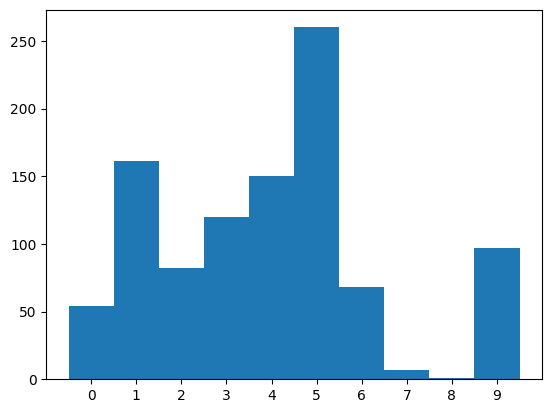

In [2]:
# Solution here
import numpy as np
import matplotlib.pyplot as plt
N = 1000
Result = np.random.rand(N)
Weights = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
Result*=sum(Weights)
#нормировали массив весов
Numbers = np.arange(10)
dict_ = {Numbers[i]: Weights[i] for i in range(10)}
sorted_dict = sorted(dict_.items(), key=lambda item: item[1])
sorted_dict.reverse()
Weights.sort()
Weights.reverse()
Weights_Advanced = 10*[0]
c = 0
for i in range(10):
  c+= Weights[i]
  Weights_Advanced[i] = c
for i in range(len(Result)):
  for j in range(10):
    if Result[i]<=Weights_Advanced[j]:
      Result[i] = sorted_dict[j][0]
      break
plt.hist(Result, bins = np.arange(-0.5, 10))
plt.xticks(ticks = Numbers)
plt.show()

### Inverse transform method

В следующем предложении заключается идея метода *inverse transform*:

Если $\xi$ имеет равномерное распределение в $[0,1]$, тогда $F^{-1}(\xi)$ распределена по закону $F$. (Для каких $F$ это верно?)

### Задача 5
Смоделируйте выборку размера 1000 из распределения $Exp(\lambda)$ с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

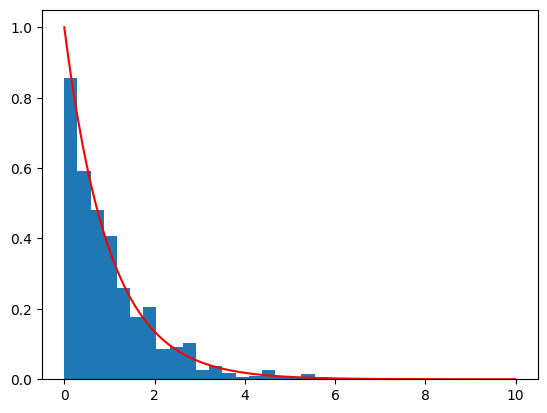

In [ ]:
# Solution here
N = 1000
lambda_ = 1
Uniform = np.random.rand(N)
Result = np.zeros(N)
x = np.arange(0, 10, 0.01);
y = lambda_ * np.exp(-lambda_* x)
Result=-lambda_ * np.log(lambda_ * Uniform)

plt.hist(Result, bins=20, density=True)

plt.plot(x,y, color = 'red')
plt.show()

### Rejection sampling (Accept-reject method)

Идея метода: сэмплить из распределения, из которого умеем, а затем отбирать точки, которые следуют нужному распределению. Более точно: пусть умеем моделировать выборку из распределения с плотностью $p$, а хотим получить выборку из распределения с плотностью $\pi$. Возьмем случайный $x$ из распределения $p$. Затем возьмем $y$, равномерно распределенный на интервале $[0, p(x)]$. Если точка $(x, y)$ попала под график $\pi$, то примем $x$ за элемент выборки из $\pi$. Если нет - повторяем процедуру для нового $x$. Картинка иллюстрирует идею метода (плотности нормируются так, чтобы одна лежала целиком под другой):
<img src=https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png style="width: 50%;"/>


### Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью $e^xcos^2x$ на отрезке $[-\pi/2, \pi/2]$. По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

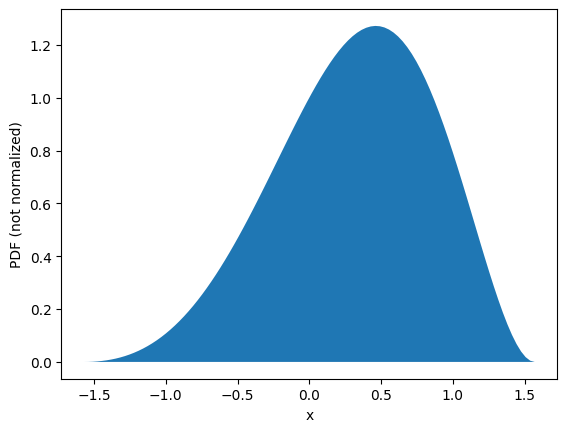

In [7]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
plt.fill_between(x, 0, density)
plt.ylabel('PDF (not normalized)')
plt.xlabel('x')
plt.show()

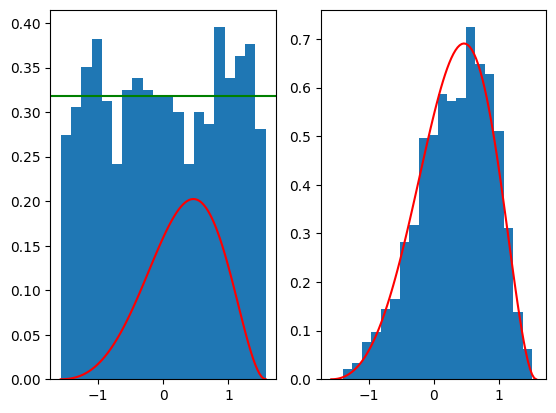

In [30]:
from scipy.special import y1p_zeros
# Solution here
#Обоснование - точки выбираются независимо для плотности Pi; если они попадают в нужную область, то мы их берем, иначе не берем
N = 1000
m = 2*np.exp(np.pi/2)/5 - 2*np.exp(-np.pi/2)/5 #интеграл от плотности по отрезку
Numbers = np.pi * np.random.rand(N) - np.pi/2
x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 /(2*np.pi)
New_samples = np.zeros(N)
for i in range(N):
  New_samples[i] = np.pi*samples[i]-np.pi/2 #берем равномерное распределение из того что давалось в начале семинара
Result = np.zeros(N)
i = 0
while i < N:
  A = np.pi*np.random.rand()-np.pi/2
  B = np.random.rand()/np.pi
  if B<=np.exp(A)*np.cos(A)**2 /(2*np.pi):
    Result[i] = A
    i+=1
ax1 = plt.subplot(1, 2, 1)
ax1.hist(New_samples,bins = 20, density = True)
ax1.plot(x, density, color = 'red')
ax1.axhline(1/np.pi, color = 'green')
ax2 = plt.subplot(1,2,2)
ax2.hist(Result,bins = 20, density = True)
ax2.plot(x, density*2*np.pi/m, color = 'red')
plt.show()

##  Coordinate transformation method

Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива -  попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей (зачем?).

### Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

<ipython-input-73-2d1bfeb65313>:8: MatplotlibDeprecationWarning: Passing the closed parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)


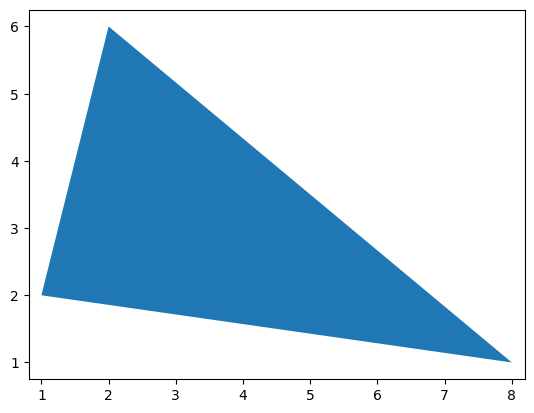

In [73]:
%matplotlib inline
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')
plt.show()

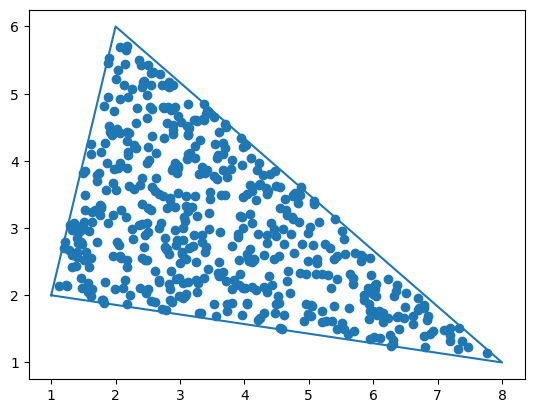

In [74]:
N = 500
X = np.random.rand(N)
Y = np.random.rand(N)
A = np.zeros(N)
B = np.zeros(N)
for i in range(N):
  A[i] = min(X[i],Y[i])
  B[i] = (1-max(X[i],Y[i]))
X_ = np.zeros(N)
Y_ = np.zeros(N)
X_ = A * 1 + B * 7
Y_ = A * 4 + B * (-1)
plt.plot([1,2,8,1],[2,6,1,2])
plt.scatter(X_+1,Y_+2)
plt.show()

### Задача 8
Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

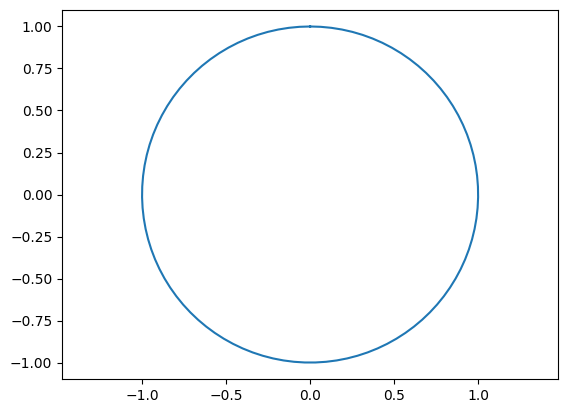

In [75]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

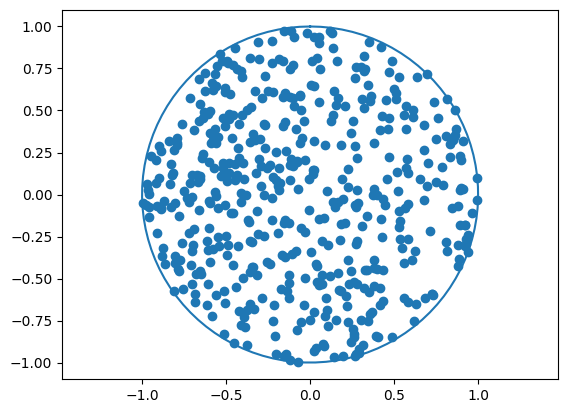

In [76]:
N = 500
X = 2*np.pi*np.random.rand(N)
Y = np.zeros(N)
Y = np.sin(X)
X = np.cos(X)
R = np.random.rand(N)
R = np.sqrt(R)
#корень взяли потому что это есть обратное преобразование от возведения в квадрат, а возведение в квадрат это то что получается
#при рассмотрении равномерного распределения с учетом весов(у нас чем дальше от центра, тем
#меньше вероятность туда попасть в случае случайного числа, хотя так быть не должно!) использовал метод Inverse
t = np.linspace(0, 2 * np.pi, 100)
plt.scatter(R*X,R*Y)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

## Random normal generator

### Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций ```np.sin``` и ```np.cos```. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20,  -4],
       [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

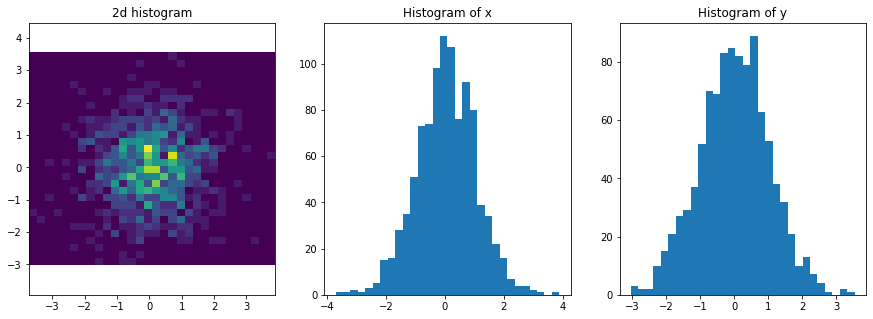

In [ ]:
%matplotlib inline

n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Expectation should be  [4, 7] but my expectation is  [4.005987812866684, 6.999181026316689]
Cov matrix should be  [[20, -4], [-4, 40]] but my cov matrix is [[19.952290113004093, -4.028155548713578], [39.96315314883718, -4.028155548713578]]


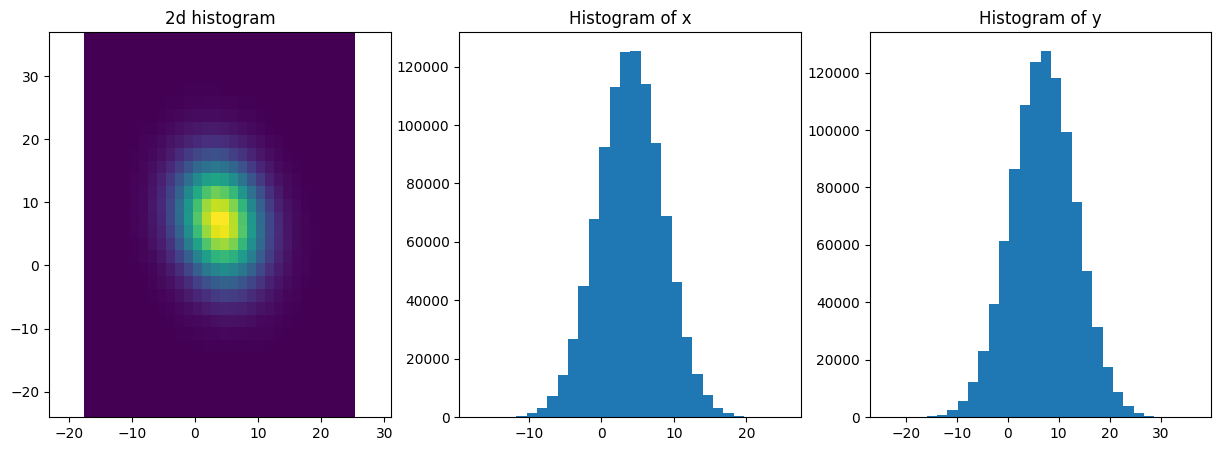

In [ ]:
N = 1000000
E = [4,7]
D = [[20, -4], [ -4, 40]]
s = np.zeros(N)
X = np.zeros(N)
Y = np.zeros(N)
c = 0
while c<N:
  u1 = 2*np.random.rand(1)
  if u1>1:
    u1 = (-1)*(u1-1)
  u2 = 2*np.random.rand(1)
  if u2>1:
    u2 = (-1)*(u2-1)
  t = u1*u1+u2*u2
  if t<1 and t>0:
    s[c] = t
    X[c] = u1
    Y[c] = u2
    c+=1
x_ = X*np.sqrt(-2 * np.log(s)/s)
y_ = Y*np.sqrt(-2 * np.log(s)/s)
x = E[0] + np.sqrt(D[0][0])*x_
y = -x/5 + 39/5 + 14*y_/np.sqrt(5)
E_x = sum(x)/N
E_y = sum(y)/N
E2_x = sum(x*x)/N
E2_y = sum(y*y)/N
D_x = E2_x - E_x*E_x
D_y = E2_y - E_y*E_y
E_x_y = sum(x*y)/N
Cov_x_y = E_x_y - E_x*E_y
print("Expectation should be ", E, "but my expectation is ", [E_x, E_y])
print("Cov matrix should be ", D, "but my cov matrix is", [[D_x,Cov_x_y],[D_y,Cov_x_y]])
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()
#тут поставил N = миллион чтобы показать что мои данные хорошие, просто при N равном тысяче есть видимые отклонения

### Задача 10*

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

In [ ]:
# Solution here